# Series Temporais

In [1]:
# Python
import pandas as pd
from prophet import Prophet

In [2]:
# Conjunto de dados
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
# Criação da instância do Prophet
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu9nya75k/9n2hvo1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu9nya75k/20tbwmf0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54201', 'data', 'file=/tmp/tmpu9nya75k/9n2hvo1w.json', 'init=/tmp/tmpu9nya75k/20tbwmf0.json', 'output', 'file=/tmp/tmpu9nya75k/prophet_modela9ge8ed7/prophet_model-20230927151146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [4]:
# Criando dataset futuro
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
# Realizando predições
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208305,7.476698,8.938178
3266,2017-01-16,8.533309,7.756769,9.272443
3267,2017-01-17,8.320714,7.624752,9.062909
3268,2017-01-18,8.153356,7.381871,8.898142
3269,2017-01-19,8.165279,7.471402,8.942331


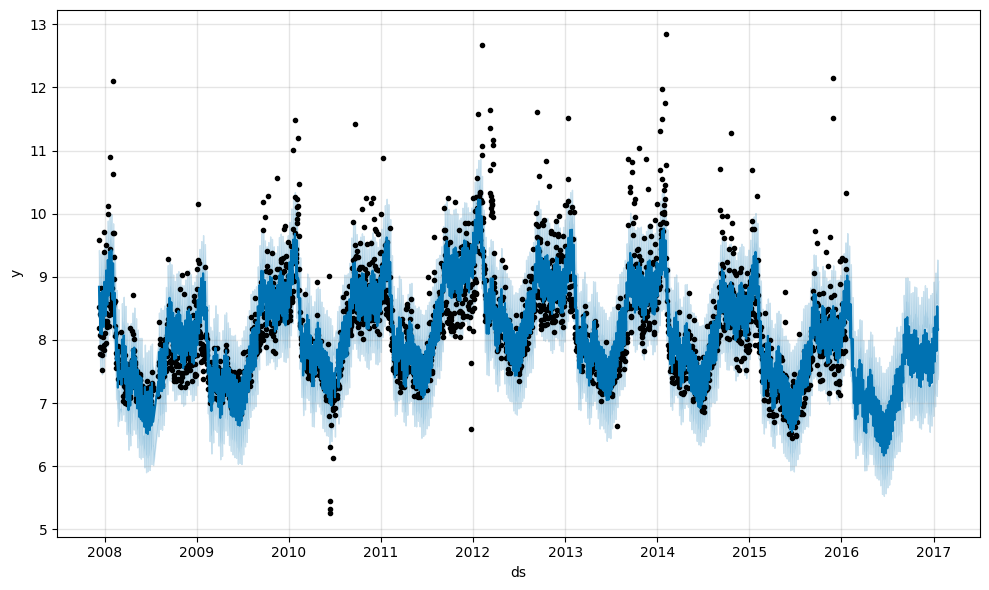

In [6]:
# Plotando figura
fig1 = m.plot(forecast)

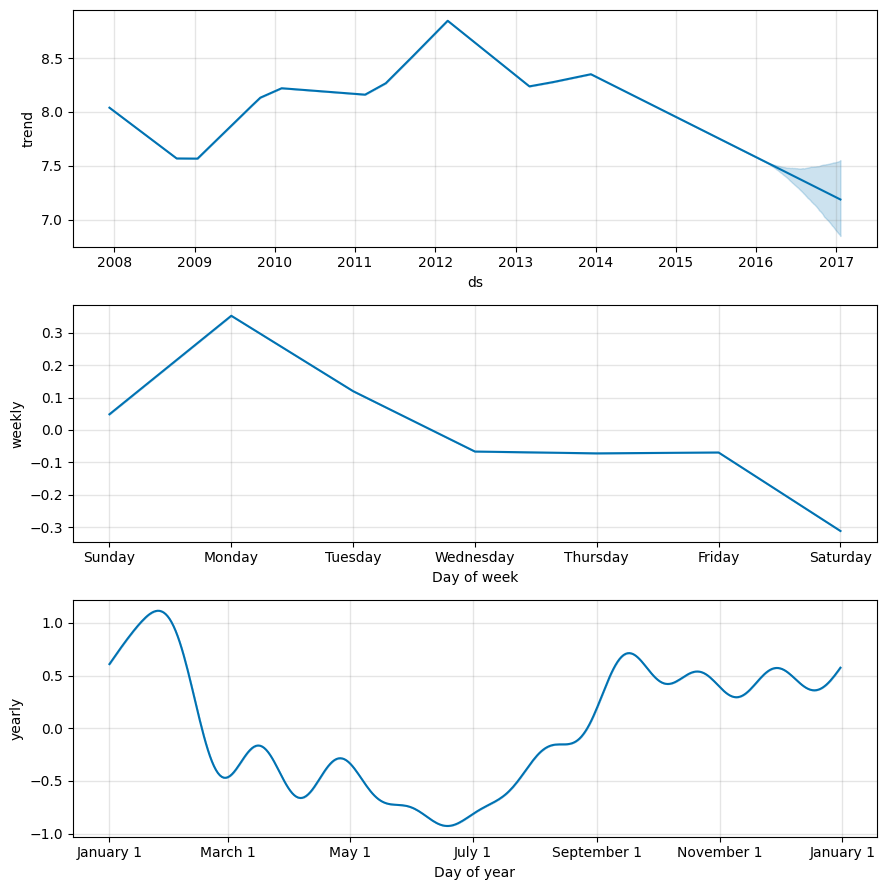

In [7]:
fig2 = m.plot_components(forecast)

# Avaliação de Modelos

- Artigo de referência: [link](https://medium.com/datarisk-io/tradeoff-entre-precisão-e-recall-explorando-o-output-de-seu-modelo-de-classificação-bd1694111033)
- [CatBoost](https://catboost.ai/en/docs/)

In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [7]:
# Bibliotecas importadas
## Importa um dataset para treinamento
from sklearn.datasets import make_classification
## Traz a função do train_test_split para dividir os dados
from sklearn.model_selection import train_test_split
## Traz o classificador CatBoost
from catboost import CatBoostClassifier
## Traz as métricas para avaliação do modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score
## Traz as bibliotecas pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Funções de auxilio
def gera_listas_recall_precisao(y_true, y_proba):
    """
    Gera listas de de recall e precisão, considerando cortes em cada   percentil
    da probabilidade do modelo.
    """
    precision_list = []
    recall_list = []
    cortes = [i/100 for i in range(0, 100)]
    for corte in cortes:
        y_temp = []
        for pred in y_proba:
            if pred < corte:
                y_temp.append(0)
            else:
                y_temp.append(1)
        precision_list.append(precision_score(y_test, y_temp))
        recall_list.append(recall_score(y_test, y_temp))
    return precision_list, recall_list, cortes
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Plota o gráfico de precisão vs recall.
    """
    plt.figure(figsize=(8, 4))
    plt.title("Precisão e Recall como função do limiar de decisão", pad=15)
    plt.plot(thresholds, precisions, "b--", label="Precisão")
    plt.plot(thresholds, recalls, "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Limiar de decisão")
    plt.legend(loc='best')

In [9]:
# Criando o dataset sintético
X, y = make_classification(
    n_samples=50000, weights=[0.80, 0.20], n_redundant=2, n_informative=5, random_state=42, flip_y=0.15
)
# Dataset criado - só para visualização
X


array([[ 1.21302247e-01, -9.07579771e-01, -2.64947334e-01, ...,
        -9.88539380e-02,  6.81383029e-01, -2.18099639e-03],
       [-2.88692983e-01, -1.67841129e+00,  1.10075523e-01, ...,
        -8.56588652e-01, -2.30503454e+00, -2.73693262e+00],
       [-1.23773864e-01,  1.45688866e+00,  1.10670638e+00, ...,
         2.40220385e-01, -7.41061783e-01, -8.16827563e-02],
       ...,
       [-4.82327955e-01,  1.92207232e+00, -2.19077479e+00, ...,
        -7.59763918e-01, -2.15555398e+00,  8.14321890e-01],
       [-2.10872279e+00,  7.58563972e-01, -2.01313907e+00, ...,
         2.89169859e-01, -1.20416991e+00,  1.16504315e+00],
       [ 5.01953424e-01,  1.37127621e+00,  3.16234970e-01, ...,
         1.25130071e+00, -1.75426732e-01,  8.48415282e-02]])

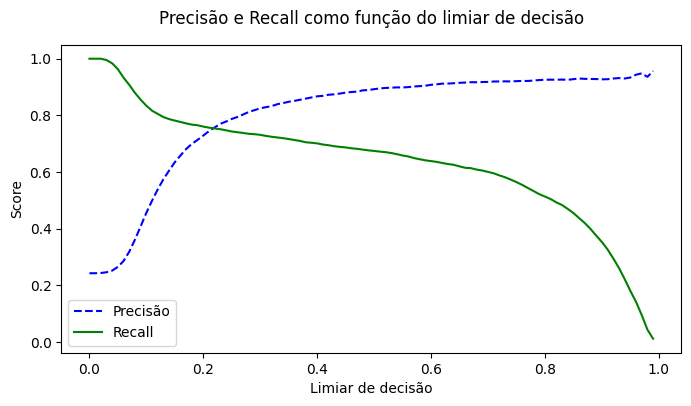

In [10]:
# Realiza a divisão dos dados entre teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Treinando o classificador
clf = CatBoostClassifier()
clf.fit(X_train, y_train, verbose=0)
# Gerando as previsões
y_proba = clf.predict_proba(X_test)[:, 1]
# Plotando a curva de precisão vs recall
precision_list, recall_list, cortes = gera_listas_recall_precisao(y_test, y_proba)
plot_precision_recall_vs_threshold(precision_list, recall_list, cortes)